# Домашнее задание

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [50]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [51]:
X, y = load_iris(return_X_y=True)
X = X[:, :2]

In [52]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=1)

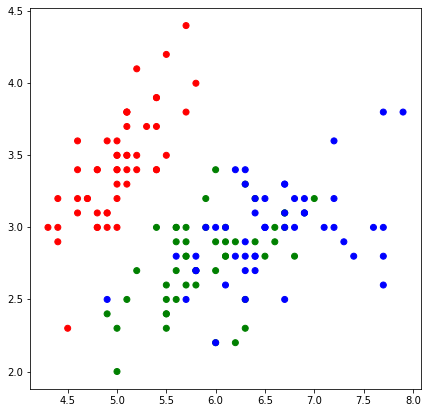

In [53]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap);

In [54]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [55]:
# Исходная функция (без весов)

def knn(x_train, y_train, x_test, k):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            test_distances.append((distance, y_train[i]))
        k_neighbours = sorted(test_distances)[0:k]
        classes = {class_item: 0 for class_item in set(y_train)}        
        for d in k_neighbours:
            classes[d[1]] += 1       
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [56]:
# Функция с добавленными весами

def knn_weighted(x_train, y_train, x_test, k, weights):
    answers = []
    for x in x_test:
        test_distances = []
        for i in range(len(x_train)):
            distance = e_metrics(x, x_train[i])
            if weights:
                w = 1 / (i + 1)
            else:
                w = 1
            test_distances.append((distance * w, y_train[i]))
        k_neighbours = sorted(test_distances)[0:k]
        classes = {class_item: 0 for class_item in set(y_train)}
        w = 1
        for i, d in enumerate(k_neighbours, start=1):
            if weights == 'i':
                w = 1 / i
            if weights == 'd':
                w = 1 / (d[0] + 1) ** 2
            classes[d[1]] += w
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [57]:
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [58]:
def get_graph(X_train, y_train, k):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])

    h = .02

    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = knn(X_train, y_train, np.c_[xx.ravel(), yy.ravel()], k)

    Z = np.array(Z).reshape(xx.shape)
    plt.figure(figsize=(7,7))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"Трехклассовая kNN классификация при k = {k}")
    plt.show()

In [59]:
k = 1

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.622


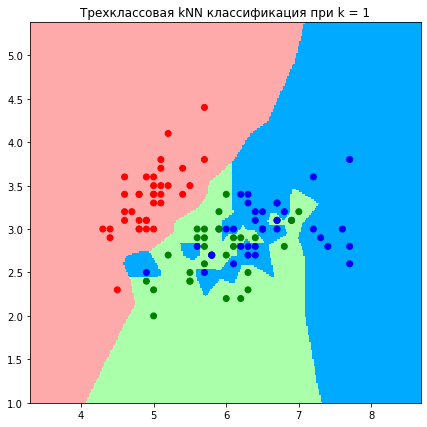

In [60]:
get_graph(X_train, y_train, k)

In [61]:
k = 1

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.733


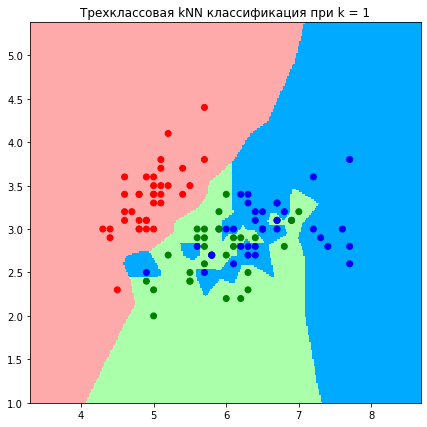

In [62]:
get_graph(X_train, y_train, k)

In [63]:
k = 3

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.667


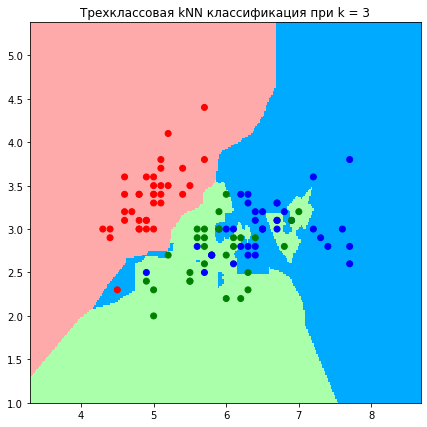

In [64]:
get_graph(X_train, y_train, k)

In [65]:
k = 3

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='d')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 3: 0.711


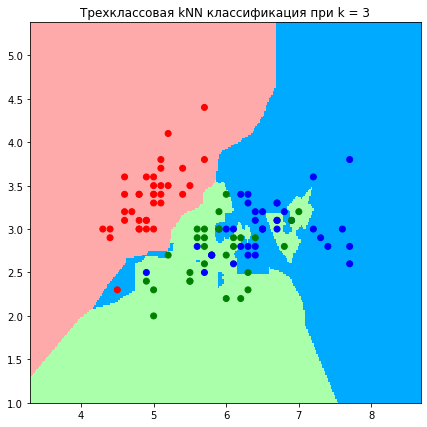

In [66]:
get_graph(X_train, y_train, k)

In [67]:
k = 5

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.756


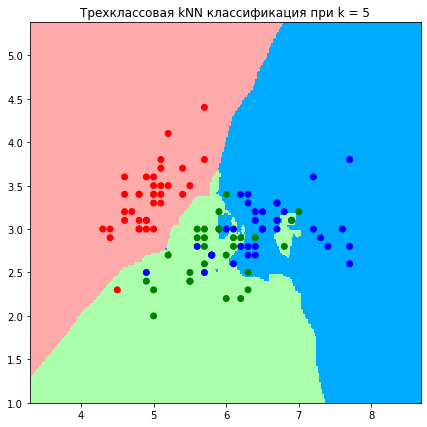

In [68]:
get_graph(X_train, y_train, k)

In [69]:
k = 5

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 5: 0.733


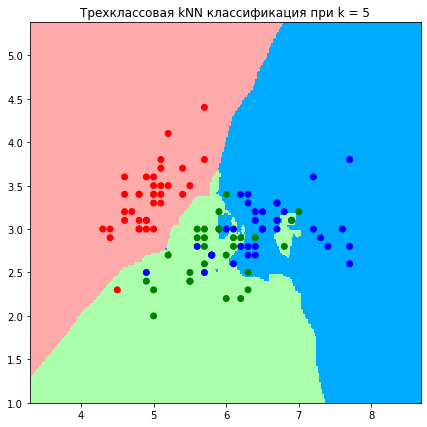

In [70]:
get_graph(X_train, y_train, k)

In [71]:
k = 10

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.756


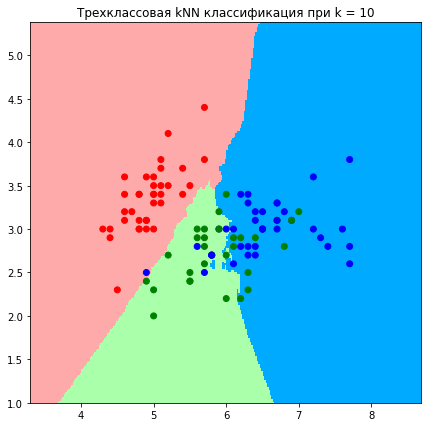

In [72]:
get_graph(X_train, y_train, k)

In [73]:
k = 10

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='d')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 10: 0.733


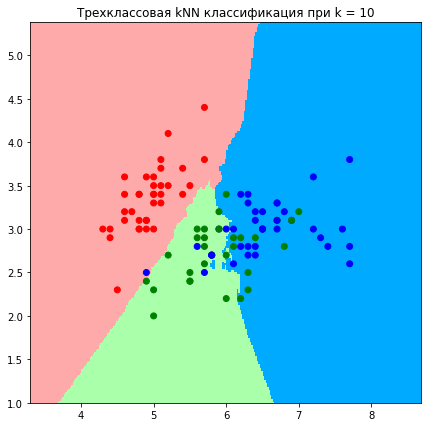

In [74]:
get_graph(X_train, y_train, k)

In [75]:
k = 50

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 50: 0.733


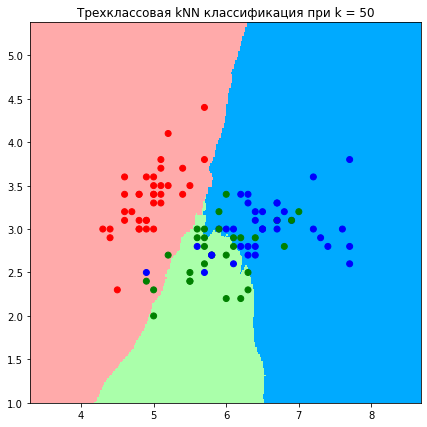

In [76]:
get_graph(X_train, y_train, k)

In [77]:
k = 50

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='i')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 50: 0.756


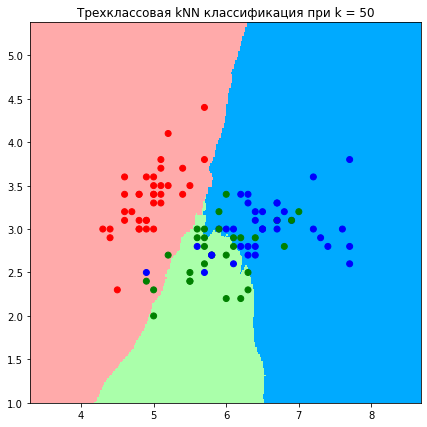

In [78]:
get_graph(X_train, y_train, k)

In [79]:
k = 100

y_pred = knn(X_train, y_train, X_test, k)

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 100: 0.578


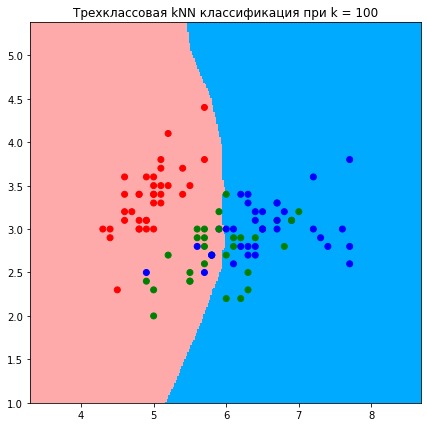

In [80]:
get_graph(X_train, y_train, k)

In [81]:
k = 100

y_pred = knn_weighted(X_train, y_train, X_test, k, weights='d')

print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 100: 0.578


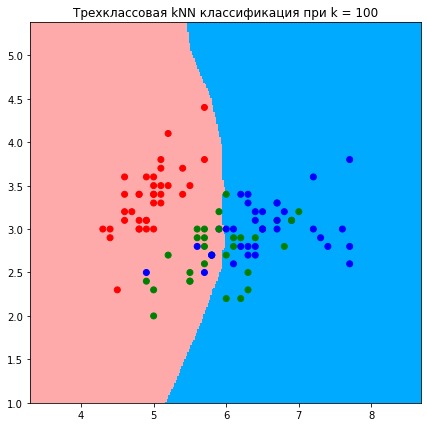

In [82]:
get_graph(X_train, y_train, k)

- В трёх случаях из шести (k = 1, k = 3, k = 50) использование функции с добавленными весами обеспечило незначительное улучшение точности алгоритма: 0.733 vs. 0.622 (k = 1); 0.711 vs. 0.667 (k = 3); 0.756 vs. 0.733 (k = 50).
- В двух случаях (k = 5, k = 10) исходная функция продемонстрировала лучшие результаты: 0.756 vs. 0.733 (k = 5, k = 10).
- При k = 100 обе функции отработали одинаково, при этом точность алгоритма снизилась до 0.578.